# Language Detection Model using NLP

In [ ]:
#Importing Required Libraries
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

In [ ]:
#Loading the Dataset into variable "df"
df= pd.read_csv("/content/Language Detection.csv")
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [ ]:
#Seeing the shape of the dataset
df.shape

(10337, 2)

In [ ]:
#count of unique values in the "Language" column
df.Language.value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [ ]:
lang_count = df.Language.value_counts()

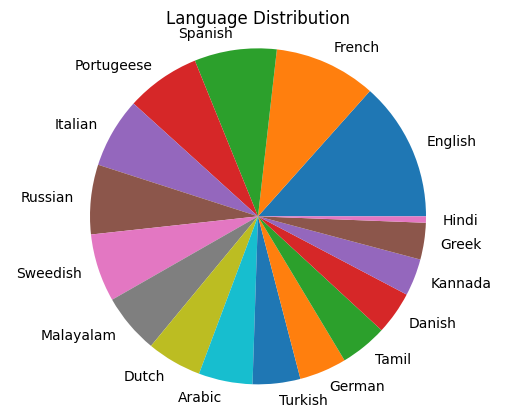

In [ ]:
#Distribution of values in Language Column
plt.pie(lang_count, labels= lang_count.index)
plt.axis('equal')
plt.title("Language Distribution")
plt.show()

## Data Preprocessing

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#Function to preprocess the data
def preprocess(text):

  for pun in string.punctuation:
    text = text.replace(pun,"")

  return text.lower()

In [ ]:
preprocess(";Data' is, EverywheRe. ANd it never* lies~") #Function Testing

'data is everywhere and it never lies'

In [ ]:
df.Text.apply(preprocess)

0         nature in the broadest sense is the natural p...
1        nature can refer to the phenomena of the physi...
2        the study of nature is a large if not the only...
3        although humans are part of nature human activ...
4        1 the word nature is borrowed from the old fre...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ  ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Name: Text, Length: 10337, dtype: object

In [ ]:
#Applying the Function on Dataset
df["Text"] = df.Text.apply(preprocess)

In [ ]:
df.head()

,Text,Language
0,nature in the broadest sense is the natural p...,English
1,nature can refer to the phenomena of the physi...,English
2,the study of nature is a large if not the only...,English
3,although humans are part of nature human activ...,English
4,1 the word nature is borrowed from the old fre...,English


In [ ]:
df[df.isnull().any(axis=1)] #No null values

,Text,Language


## Model Applying

In [ ]:
#Performing splitting of dataset into Training and Testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Text, df.Language, test_size=0.2, random_state=200, stratify=df.Language)

In [ ]:
len(X_train), len(X_test)

(8269, 2068)

In [ ]:
#Importing necessary libraries to perform TF-IDF
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter
     ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Arabic       1.00      0.93      0.96       107
      Danish       0.97      0.84      0.90        86
       Dutch       0.96      0.94      0.95       109
     English       0.98      0.97      0.98       277
      French       0.99      0.94      0.96       203
      German       1.00      0.87      0.93        94
       Greek       1.00      0.92      0.96        73
       Hindi       1.00      1.00      1.00        12
     Italian       0.95      0.95      0.95       140
     Kannada       0.44      1.00      0.61        74
   Malayalam       1.00      0.95      0.97       119
  Portugeese       0.99      0.94      0.96       148
     Russian       1.00      0.91      0.95       138
     Spanish       0.93      0.93      0.93       164
    Sweedish       0.95      0.96      0.96       135
       Tamil       1.00      0.97      0.98        94
     Turkish       0.96      0.82      0.89        95

    accuracy              

In [ ]:
X_test

1898                           ചില ഐസ്ക്രീമുകളുടെ കാര്യമോ
1091    for me under it telling me which of these 10 w...
1563    ഈ മൂന്നു വിക്കിപീഡിയകളിലും ലേഖനങ്ങളുടെ എണ്ണം ഇ...
8366    wikikod används även för att skapa mallar med ...
3813    google puis amazon qui exploitent le contenu d...
                              ...                        
27      the atmospheric conditions have been significa...
4171                               oui assurezvous allezy
846     similarity learning is an area of supervised m...
5015    en sus propias palabras y refiriéndose a la wi...
4673          ik ben bang dat ik het er niet mee eens ben
Name: Text, Length: 2068, dtype: object

In [ ]:
X_test.loc[1898]

'ചില ഐസ്ക്രീമുകളുടെ കാര്യമോ'

In [ ]:
print("Predicted:",clf.predict([X_test.loc[1898]]))
print("Actual: ",y_test.loc[1898])

Predicted: ['Malayalam']
Actual:  Malayalam


In [ ]:
print("Predicted:",clf.predict([X_test.loc[8366]]))
print("Actual: ",y_test.loc[8366])

Predicted: ['Sweedish']
Actual:  Sweedish


In [ ]:
print("Predicted:",clf.predict([X_test.loc[4673]]))
print("Actual: ",y_test.loc[4673])

Predicted: ['Dutch']
Actual:  Dutch


In [ ]:
clf.predict(["Languages is not a barrier"])

array(['English'], dtype=object)

In [ ]:
clf.predict(["आप कौन हैं"])

array(['Hindi'], dtype=object)

# Deploying the model

In [ ]:
import pickle

In [ ]:
new_pickle = open('lang_detect.pckl','wb')
pickle.dump(clf,new_pickle)
new_pickle.close()